# Data Compression - Homework #5

## Imports & Helper Functions

In [2]:
import cv2
import io
import numpy as np
import PIL.Image
from IPython.display import Image, display

In [3]:
def show_image(img, fmt="jpeg"):
    f = io.BytesIO()
    PIL.Image.fromarray(np.uint8(np.clip(img, 0, 255))).save(f, fmt)
    display(Image(data=f.getvalue(), width=200))
def quantize(x):
    return x - x%2

## Read Image

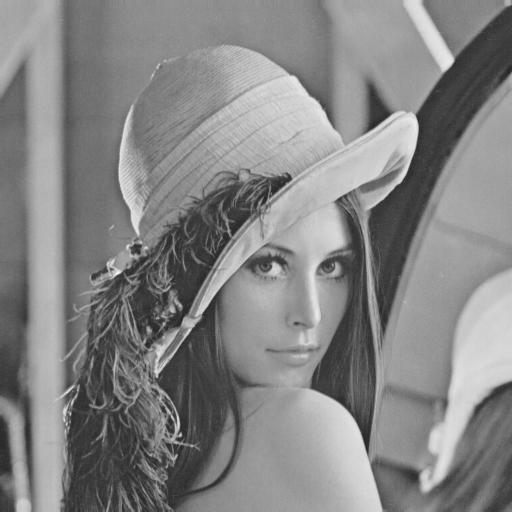

In [4]:
image = cv2.imread("Lenna.png", cv2.IMREAD_GRAYSCALE) # Read Image in Gray Scale
data = np.concatenate(image, axis=None) # Concatenate 2D arrays into 1D array
show_image(image)

## Encode & Quantization (1-bit DPCM)

In [5]:
results = []
x_hat = 0
for x in data:
    # Using the algorithm described in Example 11.3.1
    d = x - x_hat
    d_hat = quantize(d)
    x_hat = x_hat + d_hat
    results.append(d_hat)

## Restored to Image

In [6]:
restored = []
previous = 0
for each in results:
    previous = each+previous
    restored.append(previous)

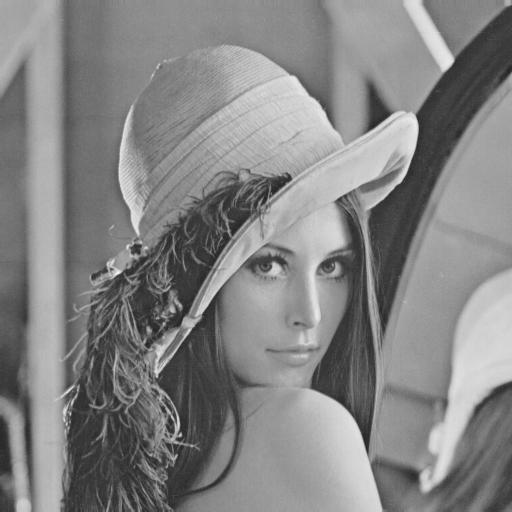

In [7]:
show_image(np.array(restored).reshape(image.shape))